In [2]:
import git.focus_stack_refinement.support_scripts as supp
import cv2 as cv
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

In [3]:
with open('datasets/focus_stack_results_voll.txt', 'r') as res:
    focus_measurements = json.loads(res.readline())


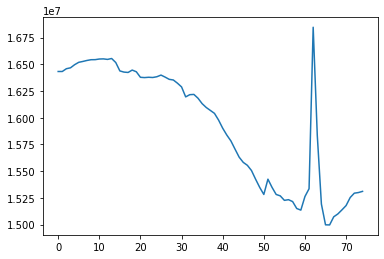

In [4]:
plt.plot(focus_measurements['Dog Cardiac Muscle fast'])



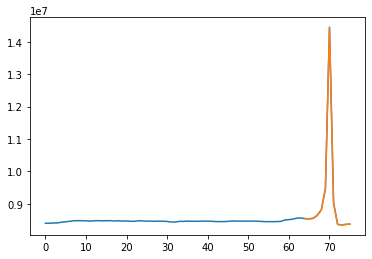

(64, 76)

In [5]:
supp.find_peak(z_stack_measures=focus_measurements['Dog Pancreas fast'])



In [6]:
for key in focus_measurements:
    if len(focus_measurements[key]) > 0:
        try:
            # supp.find_peak(output_plot_name=key, z_stack_measures=focus_measurements[key], filter_window=5)
            supp.find_peak_v4_mirror(output_plot_name=key, z_stack_measures=focus_measurements[key], filter_window=5)
        except:
            pass

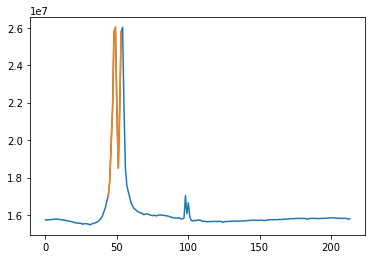

(44, 54)

In [7]:
dataset = focus_measurements['Coprinus Mushroom Set medium']
supp.find_peak_v4_mirror(z_stack_measures=dataset, filter_window=5)

In [8]:
print(focus_measurements.keys())

dict_keys(['fast', 'Earthworm 160x120 fast', 'medium', 'Earthworm 160x120 medium', 'Earthworm 320x240 fast', 'Earthworm 320x240 medium', 'Earthworm 640x480 fast', 'Earthworm 640x480 medium', 'Honeybee leg 160x120 fast', 'Honeybee leg 160x120 medium', 'Honeybee leg 320x240 fast', 'Honeybee leg 320x240 medium', 'Honeybee leg 640x480 fast', 'Honeybee leg 640x480 medium', 'Эпидермис репчатого лука 160x120 fast', 'Эпидермис репчатого лука 160x120 medium', 'Эпидермис репчатого лука 320x240 fast', 'Эпидермис репчатого лука 320x240 medium', 'Эпидермис репчатого лука 640x480 fast', 'Эпидермис репчатого лука 640x480 medium', 'Bee Worker Leg-Composite fast', 'Bee Worker Leg-Composite medium', 'Bone Marrow Mammal fast', 'Bone Marrow Mammal medium', 'Butterfly Wings Ocales fast', 'Butterfly Wings Ocales medium', 'Cerebrum Mammal fast', 'Cerebrum Mammal medium', 'Chlamydomonas fast', 'Chlamydomonas medium', 'Coprinus Mushroom Set fast', 'Coprinus Mushroom Set medium', 'Cucurbita Stem fast', 'Cucurbi

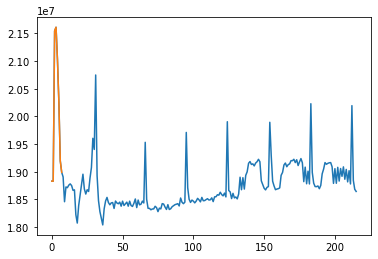

(0, 8)

In [9]:
# Нейрон fast,
# Эпидермис репчатного лука 320х240 medium
# Butterfly Wings Ocales fast
# Chlamydomonas fast
# Daphnia fast
# Dog Cardiac Muscle fast
# Пыльник лилии fast
# Pollen gem fast - интересно
# Остальные: либо сглаживание слишком выпучивает ненужный пик, либо на краю всё ещё не ищется.
# На Voll не было такого, что получился глобал макс
res = focus_measurements['Housefly Compound Eye medium']
supp.find_peak(z_stack_measures=res)

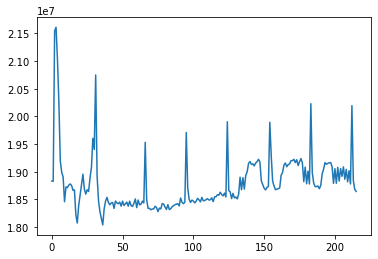

In [10]:
#res_half_size = len(res) // 2
#res = np.append(np.flip(res[0: res_half_size]), np.append(np.array(res), np.flip(res[res_half_size:])))

plt.plot(res)

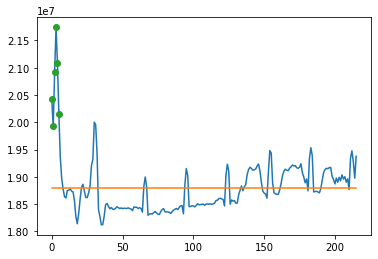

In [11]:
res_smooth = savgol_filter(res, 5, 2)
res_smooth[-1] = np.mean(res_smooth[-4:-2])
res_smooth[0] = np.mean(res_smooth[1:3])
plt.plot(res_smooth)
avg_res = np.mean(res_smooth)

plt.plot(range(0, len(res)), np.full(len(res), avg_res))
found_peaks_x, peak_props = find_peaks(res_smooth, distance=len(res), width=(0,None))
peak_lower_x = int(found_peaks_x - peak_props['widths'])
peak_lower_y = int(found_peaks_x + peak_props['widths']) + 1
peak_range = range(peak_lower_x, peak_lower_y)

found_peaks_y = res_smooth[found_peaks_x[0]]
plt.plot(peak_range, np.array(res_smooth)[peak_range], 'o')


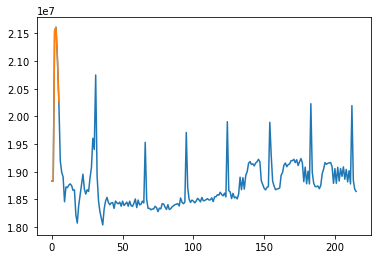

In [12]:
plt.plot(res)
plt.plot(peak_range, np.array(res)[peak_range])

In [13]:
# где заметны эффекты пыли: Нейрон fast, поперечнополосатая, пыльник лилии, mutation of drosophila, locust mouth parts,
# housefly compound eye, daphnia, butterfly wing ocales

In [14]:
# дальше разбираюсь, чё такое.
# 1. на границах чтобы норм искалось.
# 2. Не оверсглаживалось - изучить фильтры, подобрать самые норм (без них точно нельзя?)
# 3.есть некоторые, где неоч ищется - поправить
# 4. наладить сравнение с TENG

# Жоские: butterfly wings scales, Housefly Compoud Eye (вообще чёто странное), Mutation of Drosophila
# Заметил, что на низком разрешении с тряской плохие графики + края
# На норм качестве проблемы, только когда размытый фон даёт высок. сфокусированность - по производной смотреть или сглаживать хз.

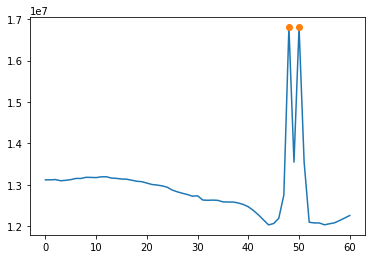

In [15]:
# Играемся с параметрами find_peaks
res = focus_measurements['Dog Small Intestine fast']
found_peaks_x, peak_props = find_peaks(res, width=(0, None), prominence=(100000, None))

# NOTE: mb повышать prominence бин поиском, пока не найдём пик.

#peak_lower_x = int(found_peaks_x - peak_props['widths'])
#peak_lower_y = int(found_peaks_x + peak_props['widths']) + 1
#peak_range = range(peak_lower_x, peak_lower_y)

plt.plot(res)
#plt.plot(range(0, len(res)), np.full(len(res), res))
plt.plot(found_peaks_x, np.array(res)[found_peaks_x], 'o')

109
100
110
0
9


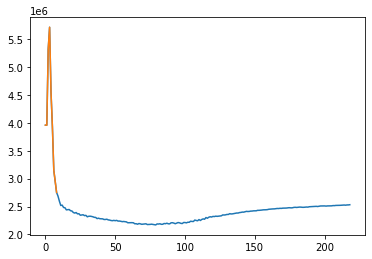

In [16]:
import time
res = focus_measurements['Earthworm 320x240 medium']
res_smooth = savgol_filter(res, 5, 2)

res_half_size = len(res_smooth) // 2
res_smooth_avg = np.mean(res_smooth)
res_smooth = np.append(np.flip(res_smooth[0: res_half_size]),
                             np.append(np.array(res_smooth),
                                       np.flip(res_smooth[res_half_size:])))
# start_time = time.time()
# for i in range(0, 100):
#     found_peaks_x, peak_props = find_peaks(res_smooth, width=(0, None), prominence=(100000, None))
# print(1000 * (time.time() - start_time), 'millis')

##############################
# NOTE: mb повышать prominence бин поиском, пока не найдём пик.
res_smooth_glob_min = np.min(res_smooth)
res_smooth_glob_max = np.max(res_smooth)
res_smooth_max_prominence = res_smooth_glob_max - res_smooth_glob_min

start_prominence = 0
end_prominence = res_smooth_max_prominence
found_peaks_x, peak_props = find_peaks(res_smooth, width=(0, None), prominence=(start_prominence, None))
num_of_peaks = len(found_peaks_x)
while num_of_peaks != 1 and start_prominence != end_prominence:
    mid_prominence = (end_prominence + start_prominence) // 2
    found_peaks_x, peak_props = find_peaks(res_smooth, width=(0, None), prominence=(mid_prominence, None))
    num_of_peaks = len(found_peaks_x)
    if num_of_peaks >= 1:
        if start_prominence == mid_prominence:
            break
        start_prominence = mid_prominence
    else:
        end_prominence = mid_prominence
##############################
# NOTE: Возможно, что два пика полностью одинаковы => выдаст их - надо обработать

def transform_back(x, y, thresh_1, thresh_2):
    if (x + y) / 2 < thresh_1:
        x_m = y + 2 * (thresh_1 - y)
        y_m = x + 2 * (thresh_1 - x)
    elif (x + y) / 2 >= thresh_2:
        x_m = y + 2 * (thresh_2 - y)
        y_m = x + 2 * (thresh_2 - x)
    else:
        x_m = x
        y_m = y
    return max(x_m, thresh_1) - thresh_1, min(y_m, thresh_2) - thresh_1

# NOTE: тут предполагаю, что пики не найдутся в искусственных плато - можно это математически
# доказать? Может произойти так, что они будут за границей?
peak_lower_x = int(found_peaks_x[0] - peak_props['widths'][0])
peak_lower_y = int(found_peaks_x[0] + peak_props['widths'][0]) + 1

print(res_half_size)

print(peak_lower_x)
print(peak_lower_y)

peak_lower_x, peak_lower_y = transform_back(peak_lower_x, peak_lower_y, res_half_size, len(res) + res_half_size)

peak_range = range(peak_lower_x, peak_lower_y)
print(peak_lower_x)
print(peak_lower_y)
plt.plot(res)
#plt.plot(range(0, len(res)), np.full(len(res), res))
plt.plot(peak_range, np.array(res)[peak_range])

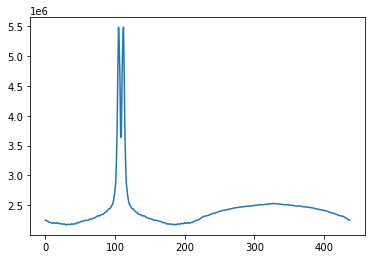

In [17]:
# NOTE: всё ещё проблемы с границами! И Pollen Gem - слишком сильное сглаживание
# Housefly Compound Eye - плохо всё. Может, датасет такой сложный?
# Но в остальном всё хорошо.

plt.plot(res_smooth)


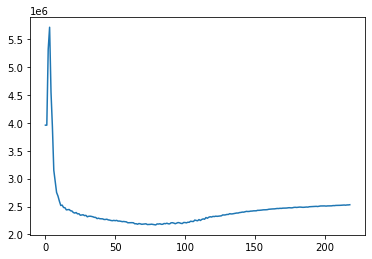

In [18]:
# NOTE: решаю проблемы с границами: продлить массив налево - направо средним значением
# NOTE: на всю длину, чтобы самый худший случай - крайний пик на весь массив - работал ок
res_half_size = len(res_smooth) // 2
res_smooth = np.append(np.flip(res_smooth[0: res_half_size]),
                       np.append(np.array(res_smooth),
                                 np.flip(res_smooth[res_half_size:])))

plt.plot(res)

In [19]:
# NOTE: следующий шаг: сделать функцию - алгоритм новой версии, прогнать VOLL json на ней
# дальше надо будет тюнить сглаживание и смотреть, всё ли ок. После устроить сравнение с TENG

# на краях: слишком часто они прокали, сделал через отражение в две стороны - медленнее стало
# на некоторых не ок, интервал некорректно отображается обратно

# переделал, сейчас всё ок. Образца 4 работают некорректно:
# * пофиксить сглаживание (нужно, чтобы резкие пики не сглаживались особо, с двойные склеивались
# * по-другому пики искать, как-то через производные
# * рабочий ли способ через статистику всё это делать? Типа нашёл пик, и отрезок = +- 10